# Dataset Cleaning and Merging

by Nan BAI

In [ ]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib

args = Namespace(
    # Data and Path information
    save_dir = 'data_storage/',
    image_dir = 'data_storage/images/'
)

## For Large Dataset of Venice

### Data Imports

In [51]:
size_df = pd.read_csv('data_storage/images/photos_sizes.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

The large data has unlimited number of indexes during the data collection period to collect as much data as possible, in this case, 116675 posts have been retrieved

In [26]:
size_df['index'] = size_df['index'].astype(str)

In [52]:
size_df

index        index          owner                 owner_loc  \
0            0  50770182122   51973207@N00                       NaN   
1            1  50770181367   51973207@N00                       NaN   
2            2  50770065816   51973207@N00                       NaN   
3            3  50770737177   54945580@N04                   Bergamo   
4            4  50769627753  127349327@N05  Perth, Western Australia   
...        ...          ...            ...                       ...   
116670  123096  20879329608   23097900@N02                   Germany   
116671  123097  21040989736   23097900@N02                   Germany   
116672  123098  20880415099   23097900@N02                   Germany   
116673  123099  20879281658   23097900@N02                   Germany   
116674  123100  21074834751   23097900@N02                   Germany   

                                                    title  \
0                                    Campo Santi Apostoli   
1                                  Sestiere di Cannaregio   
2                                  Sestiere di Cannaregio   
3                           Characteristic Venetian alley   
4       Arch and Steps, Corte dei Conti, Campo Sant'An...   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
0                                   Venice - January 2019         0   
1                                   Venice - January 2019         0   
2                                   Venice - January 2019         0   
3       Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM         3   
4                                                     NaN         2   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  \
0       2019-01-06 09:20:55      6       0   
1       2019-01-06 09:19:10      0       0   
2       2019-01-06 09:17:36      0       0   
3       2018-10-14 14:20:37     85       0   
4       2017-10-03 11:35:09     64       0   
...                     ...    ...     ...   
116670  2015-07-03 11:34:58    244       0   
116671  2015-07-03 11:04:10    156       0   
116672  2015-07-03 11:34:25    163       0   
116673  2015-07-03 12:46:41    237       0   
116674  2015-07-03 11:45:53    160       0   

                                                     tags        lat  \
0       [{'id': '6867053-50770182122-166', 'author': '...  45.440298   
1       [{'id': '6867053-50770181367-166', 'author': '...  45.440064   
2       [{'id': '6867053-50770065816-166', 'author': '...  45.440064   
3       [{'id': '54913441-50770737177-5196', 'author':...  45.437688   
4       [{'id': '127343987-50769627753-747', 'author':...  45.434138   
...                                                   ...        ...   
116670  [{'id': '23077552-20879329608-42837', 'author'...  45.444204   
116671  [{'id': '23077552-21040989736-42837', 'author'...  45.444204   
116672  [{'id': '23077552-20880415099-42837', 'author'...  45.444204   
116673  [{'id': '23077552-20879281658-42837', 'author'...  45.444204   
116674  [{'id': '23077552-21074834751-42837', 'author'...  45.444204   

              lon neighbourhood  \
0       12.336573        Rialto   
1       12.336573        Rialto   
2       12.336573        Rialto   


Only the data with downloadable marks are kept for further analysis, which yields 80,964 downloaded images

In [81]:
df = size_df[size_df['candownload']==1]

In [82]:
df

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  \
6       2010-03-27 12:47:45     90       0   
7       2010-03-27 12:45:28    238       0   
10      2020-08-11 11:48:15     25       0   
11      2020-08-11 11:44:31     27       0   
12      2020-08-11 11:43:19     20       0   
...                     ...    ...     ...   
116670  2015-07-03 11:34:58    244       0   
116671  2015-07-03 11:04:10    156       0   
116672  2015-07-03 11:34:25    163       0   
116673  2015-07-03 12:46:41    237       0   
116674  2015-07-03 11:45:53    160       0   

                                                     tags        lat  \
6       [{'id': '148093365-50770113131-133967', 'autho...  45.435830   
7       [{'id': '148093365-50770228312-133967', 'autho...  45.435677   
10      [{'id': '32975044-50766039303-357674', 'author...  45.437888   
11      [{'id': '32975044-50766893587-2213', 'author':...  45.437502   
12      [{'id': '32975044-50766892772-2785696', 'autho...  45.437338   
...                                                   ...        ...   
116670  [{'id': '23077552-20879329608-42837', 'author'...  45.444204   
116671  [{'id': '23077552-21040989736-42837', 'author'...  45.444204   
116672  [{'id': '23077552-20880415099-42837', 'author'...  45.444204   
116673  [{'id': '23077552-20879281658-42837', 'author'...  45.444204   
116674  [{'id': '23077552-21074834751-42837', 'author'...  45.444204   

              lon neighbourhood  \
6       12.335565        Rialto   
7       12.335436        Rialto   

### Data Cleaning and Processing

#### Finding Locals and Neighbourhoods

The data are distributed in 37 different neighbourhoods in Venice, posted by 6077 different owners, among which 76 are local Venician people, due to their indicated locations in Flickr user profile, who contributed 2014 posts

In [123]:
df['neighbourhood'].unique()

array(['Rialto', 'Venice', 'Dorsoduro', nan, 'San Marco', 'Cannaregio',
       'Piazzale Roma', 'Santa Croce', 'Sestière di San Polo', 'Castello',
       'Giudecca', 'San Nicolò di Lido', 'San Lazzaro degli Armeni',
       'Murano', 'Punta Sabbioni', 'Mazzorbo', 'Quartiere S. Elena',
       'San Giorgio Maggiore', 'Quartiere San Giacomo', "Sant'Erasmo",
       'Moranzani', 'Venice-Lido', 'Quartiere Campo di Marte',
       'Città Giardino', "Sant'Elena", 'Fusina', 'Tessera', 'Mestre',
       'Vignola Piccola', 'San Polo', 'San Croce', 'Isola Sacca Fisola',
       'Isola della Guidella', 'Isola dis Giorgio', 'Lido di Venezia',
       'Isola delle Tesse', 'Nuova Isola del Tronchetto'], dtype=object)

In [84]:
len(df['neighbourhood'].unique())

37

In [85]:
len(df['owner_loc'].unique())

1640

In [86]:
locations = [now for now in list(df['owner_loc'].unique()) if 'venice' in str(now).lower() and 'usa' not in str(now).lower() 
             and 'united state' not in str(now).lower() or 'venezia' in str(now).lower()]
locations

['Lido di Venezia',
 'Venezia',
 'San Donà di Piave  (Venezia), Italia',
 'Venezia, Italy',
 'venice, italy',
 'venezia',
 'Venezia, Italia',
 'Padova, Venezia, Udine',
 'Friuli Venezia Giulia, Italia',
 'Mestre Venezia, Italia',
 'Chioggia, Venezia, Italia',
 'Venice, Italy',
 'VENEZIA, Italia',
 'VENICE , ITALY',
 'venezia, italy',
 'venezia, italia',
 'Trento/Venezia, Italia',
 'Venezia-Mestre',
 'VENEZIA, ITALIA',
 'vENEZIA, iTALY',
 'Pordenone/Venice',
 'Venice',
 'Spinea - Venezia, Italia',
 'Chioggia - Venezia, Italia',
 "Gaza-treviso(porcòdio) padova venezia un prato d'estate",
 'italy, Venice',
 'MESTRE  VENICE, ITALY',
 'venice , italy',
 'Fondamenta Santa Lucia - Cannaregio 23, Venezia Italia',
 'San Donà di Piave, Venice, Italy',
 'venezia-salamanca',
 'Cavallino (Venezia), Italy',
 'Milano, Venezia, Italy',
 'Venezia / Venice, Italia / Italy',
 'Oriago di Mira-Venezia, Italy',
 'Venice, Italy, Italy']

In [87]:
df['local'] = df['owner_loc'].apply(lambda x: x in locations)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\1482302024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local'] = df['owner_loc'].apply(lambda x: x in locations)


In [88]:
len(df[df['local']]['owner'].unique())

76

In [89]:
len(df[df['local']])

2014

In [90]:
len(df['owner'].unique())

6077

#### Processing Tags and Converting to lists

In [91]:
import re
re.findall(r'_content\': \'([a-zA-Z]+)',df['tags'].iloc[0])

['palacio', 'patio', 'italia', 'venecia']

In [92]:
df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\1574953216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))


In [93]:
df['tag_len'] = df['tag_list'].apply(lambda x: len(x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\1455675285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_len'] = df['tag_list'].apply(lambda x: len(x))


#### Filtering out Erotic images

In [101]:
df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\3038830451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x)


In [104]:
df = df[~df['NOT']]

#### Generating Timestamps for the posts

In [105]:
df['year'] = df['taken'].apply(lambda x: int(x[:4]))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\40314514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['taken'].apply(lambda x: int(x[:4]))


In [106]:
df['time'] = df['taken'].apply(pd.Timestamp)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\3965765013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['taken'].apply(pd.Timestamp)


In [107]:
df['week'] = df['time'].apply(lambda x: x.week)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\1498983366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['time'].apply(lambda x: x.week)


In [108]:
df['unique_week'] = df['year'] * 100 + df['week']

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\3367497227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_week'] = df['year'] * 100 + df['week']


In [109]:
len(df['unique_week'].unique())

915

In [110]:
df['year'].unique()

array([2010, 2020, 2016, 2018, 2005, 2015, 2011, 2012, 2019, 2017, 2014,
       2013, 2009, 2001, 2002, 1955, 2006, 2008, 2007, 1981, 1972, 2004,
       1970, 1974, 1984, 1985, 2003, 1999, 1991, 1986, 1978, 1997, 1875,
       1995, 1989, 1983, 1980, 1987, 1990, 1975, 2000, 1960, 2021, 1988,
       1976, 1965, 1979, 1982, 1994], dtype=int64)

In [111]:
df

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ...  \
6       2010-03-27 12:47:45     90       0  ...   
7       2010-03-27 12:45:28    238       0  ...   
10      2020-08-11 11:48:15     25       0  ...   
11      2020-08-11 11:44:31     27       0  ...   
12      2020-08-11 11:43:19     20       0  ...   
...                     ...    ...     ...  ...   
116670  2015-07-03 11:34:58    244       0  ...   
116671  2015-07-03 11:04:10    156       0  ...   
116672  2015-07-03 11:34:25    163       0  ...   
116673  2015-07-03 12:46:41    237       0  ...   
116674  2015-07-03 11:45:53    160       0  ...   

                                                      url  candownload  local  \
6       https://www.flickr.com/photos/eduortin/5077011...         True  False   
7       https://www.flickr.com/photos/eduortin/5077022...         True  False   
10      https://www.flickr.com/photos/senarvi/50766039...         True  False   
11      https://www.flickr.com/photos/senarvi/50766893...         True  False   
12      https://www.flickr.com/photos/senarvi/50766892...         True  False   
...                                                   ...          ...    ...   
116670  https://www.flickr.com/photos/suesswassermatro...         True  False   
116671  https://www.flickr.com/photos/suesswassermatro...         True  False   
116672  https://www.flickr.com/photos/suesswassermatro...         True  False   
116673  https://www.flickr.com/photos/suesswassermatro...         True  False   
116674  https://ww

### Creating a New Dataset of data with text descriptions

#### Filtering out an initial subset with text descriptions

In total, 77,644 out of 80,963 complete posts have at least one text field (description, title, or tags) that is not empty.

In [112]:
df_new = df[~((df['description'].isnull())&(df['title'].isnull())&(df['tag_len']==0))]
df_new

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ...  \
6       2010-03-27 12:47:45     90       0  ...   
7       2010-03-27 12:45:28    238       0  ...   
10      2020-08-11 11:48:15     25       0  ...   
11      2020-08-11 11:44:31     27       0  ...   
12      2020-08-11 11:43:19     20       0  ...   
...                     ...    ...     ...  ...   
116670  2015-07-03 11:34:58    244       0  ...   
116671  2015-07-03 11:04:10    156       0  ...   
116672  2015-07-03 11:34:25    163       0  ...   
116673  2015-07-03 12:46:41    237       0  ...   
116674  2015-07-03 11:45:53    160       0  ...   

                                                      url  candownload  local  \
6       https://www.flickr.com/photos/eduortin/5077011...         True  False   
7       https://www.flickr.com/photos/eduortin/5077022...         True  False   
10      https://www.flickr.com/photos/senarvi/50766039...         True  False   
11      https://www.flickr.com/photos/senarvi/50766893...         True  False   
12      https://www.flickr.com/photos/senarvi/50766892...         True  False   
...                                                   ...          ...    ...   
116670  https://www.flickr.com/photos/suesswassermatro...         True  False   
116671  https://www.flickr.com/photos/suesswassermatro...         True  False   
116672  https://www.flickr.com/photos/suesswassermatro...         True  False   
116673  https://www.flickr.com/photos/suesswassermatro...         True  False   
116674  https://ww

In [113]:
df_new['description'] = df_new['description'].fillna('')
df_new['title'] = df_new['title'].fillna('')

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2513102529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['description'] = df_new['description'].fillna('')
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2513102529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['title'] = df_new['title'].fillna('')


Merging the three types of text data into one complete paragraph with the order of description -> title -> tags.

In [114]:
df_new['text_data'] = df_new.apply(lambda x: str(x['description']) + '. It has title of ' + str(x['title']) + '. It has tags of ' + ', '.join(x['tag_list']), axis=1)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\475771120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text_data'] = df_new.apply(lambda x: str(x['description']) + '. It has title of ' + str(x['title']) + '. It has tags of ' + ', '.join(x['tag_list']), axis=1)


In [115]:
df_new['text_data']

6         El palacio Contarini del Bovolo (también llama...
7         El palacio Contarini del Bovolo (también llama...
10        Canal Grande on Venetsian pääliikenneväylä. Ku...
11        Corona-rajoitusten aikaan oli hyvä tilaisuus k...
12        Corona-rajoitusten aikaan oli hyvä tilaisuus k...
                                ...                        
116670    <a href="http://www.brusatotrasporti.it/index....
116671    . It has title of Tür No.342. It has tags of v...
116672    . It has title of Ave Maria. It has tags of ve...
116673    . It has title of Kirchenportal der Chiesa di ...
116674    <a href="http://www.venediginformationen.eu/ue...
Name: text_data, Length: 77644, dtype: object

Only 59,396 out of the 77,644 text data are unique to each other, i.e., not repetitive.

In [116]:
len(df_new['text_data'].unique())

59396

#### Filtering out a sub-dataset with unique text data

Only the *FIRST* data point is kept while there are duplicates

In [117]:
candidates = df_new.drop_duplicates(subset='text_data',keep='first')
len(candidates)

59396

### Detecting Different Languages in the Texts and Translating all to English

#### Library Imports with Google Translator API

In [118]:
from langdetect import detect
from deep_translator import GoogleTranslator

In [119]:
translated = GoogleTranslator(source='auto', target='en').translate("io bevo uno cappucino")
translated

'I drink a cappucino'

In [120]:
translated = GoogleTranslator(source='auto', target='en').translate('Verso la laguna')
translated

'Towards the lagoon'

In [121]:
detect(candidates['text_data'].iloc[4])

'fi'

#### Text normalization and processing, Detecting Languages, and Performing Translations

A new sentence occur when there is a period(.), exclamation mark(!), question mark(?) or semi-colon(;). The html signs, http addresses, formating elements of the texts, special quotation marks, and copyright symbol is removed. Only a sentence piece with no less than 3 words are considered for translation task.

Italian is distinguished from the other non-English texts.

In [ ]:
candi_dict_en = {}
candi_dict_it = {}
candi_dict_it_trans = {}
candi_dict_other = {}
candi_dict_other_trans = {}
origin_en = []
origin_it = []
origin_other = []
origin_other_lan = []
for i in candidates['text_data'].index:
    for sent in candidates['text_data'][i].replace('St.', 'St').replace('S.', 'S').replace('!', '.').replace('?', '.').replace(';', '.').split('. '):
        try:
            sent = re.sub(r'\<.*\>', '', sent)
            sent = re.sub(r'http[s]?://\S+', '', sent)
            sent = re.sub(r'--+', '', sent)
            sent = re.sub(r'\*+', '', sent)
            sent = sent.replace('\n', ' ').replace('&quot', '').replace('&amp', '').replace('#', '').replace('\\','')
            sent = sent.replace('“', ' ').replace('„', ' ').replace('”', ' ')
            sent = sent.replace('©', '')
            for senty in sent.split('. '):
                tt = 0
                if len(senty.split())<3:
                    continue
                if senty.startswith('It has title of') or senty.startswith('It has tags of'):
                    senti = ' '.join(senty.split()[4:])
                    tt = 1
                else:
                    senti = senty
                if detect(senti)=='en' and senty.strip() not in candi_dict_en:
                    candi_dict_en[len(candi_dict_en)] = senty.strip()
                    origin_en.append(i)
                elif detect(senti)=='it' and senty.strip() not in candi_dict_it:
                    candi_dict_it[len(candi_dict_it)] = senty.strip()
                    if tt==1:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_it.append(i)
                elif detect(senti)!='it' and detect(senti)!='en' and senty.strip() not in candi_dict_other:
                    candi_dict_other[len(candi_dict_other)] = senty.strip()
                    if tt==1:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_other.append(i)
                    origin_other_lan.append(detect(senty))
        except Exception as e:
            print(e)
            continue

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

In [154]:
for i in candidates['text_data'].index:
    for sent in candidates['text_data'][i].replace('St.', 'St').replace('S.', 'S').replace('!', '.').replace('?', '.').replace(';', '.').split('. '):
        try:
            sent = re.sub(r'\<.*\>', '', sent)
            sent = re.sub(r'http[s]?://\S+', '', sent)
            sent = re.sub(r'--+', '', sent)
            sent = re.sub(r'\*+', '', sent)
            sent = sent.replace('\n', ' ').replace('&quot', '').replace('&amp', '').replace('#', '').replace('\\','')
            sent = sent.replace('“', ' ').replace('„', ' ').replace('”', ' ')
            sent = sent.replace('©', '')
            for senty in sent.split('. '):
                tt = 0
                if len(senty.split())<3:
                    continue
                if senty.startswith('It has title of') or senty.startswith('It has tags of'):
                    senti = ' '.join(senty.split()[4:])
                    tt = 1
                else:
                    senti = senty
                if detect(senti)=='en' and senty.strip() not in candi_dict_en:
                    candi_dict_en[len(candi_dict_en)] = senty.strip()
                    origin_en.append(i)
                elif detect(senti)=='it' and senty.strip() not in candi_dict_it:
                    candi_dict_it[len(candi_dict_it)] = senty.strip()
                    if tt==1:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_it.append(i)
                elif detect(senti)!='it' and detect(senti)!='en' and senty.strip() not in candi_dict_other:
                    candi_dict_other[len(candi_dict_other)] = senty.strip()
                    if tt==1:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_other.append(i)
                    origin_other_lan.append(detect(senty))
        except Exception as e:
            print(e)
            continue

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

In total, 20,985, 29,046, and 41,615 sentences are detected as English, Italian, and Other languages, respectively. After filtering out text data with less than 3 words, 57,635 out of 59,396 sentences remained.

In [155]:
len(set(origin_en)), len(set(origin_it)), len(set(origin_other)), len(set(origin_en).union(set(origin_it)).union(set(origin_other)))

(20985, 29046, 41615, 57635)

#### Filtering out Non-relevant Text data for Heritage Values and Attributes

The stop word list includes camera brands, file names, advertisements, and place-holder formats for specific types of data (e.g., scanned from analog).

In [127]:
stoplist = ['sony', 'canon ', 'iphone','dilution','chesterton','leica','nikon','fuji','img','buy','steam','rolleiflex','ilford',
            'sigma','e6', 'click', 'gear','luminance','fs','mercedes','spp','actv','atvo','samyang','thank','notes','twitter',
            'gaz','oebb','follow','scan','voightlander','dsc', 'm1x', 'p10', 'f21', 'dhg', 'd01','l10', '_mg', '[','psx', 'zmr',
            'discount', 'c_','shot','imag1','imag2','photo', 'by:', 'how_', 'dpp', 'olympus','_dsc']

In [160]:
filter_dict_en = {}
filter_dict_it = {}
filter_dict_other = {}

In [161]:
origindicts = [candi_dict_en, candi_dict_it_trans, candi_dict_other_trans]
targdicts = [filter_dict_en, filter_dict_it, filter_dict_other]

In [162]:
for i in range(len(origindicts)):
    dic1 = origindicts[i]
    dic2 = targdicts[i]
    for k,v in dic1.items():
        record = 1
        if v.startswith('It has tags of'):
            dic2[k] = v
        elif v.startswith('It has title of'):
            for w in stoplist:
                if ' '.join(v.lower().split()[4:]).startswith(w) or ' '.join(v.split()[4:])[:4].isupper() or ' '.join(v.split()[4:])[:4].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v
        else:
            for w in stoplist:
                if v.lower().startswith(w) or v[:5].isupper() or v[:5].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v

11 PERCHE' SEMPRE LE STESSE IMMAGINI .. sony
12 CANON EOS 6D Mark II con ob sony
13 CANON EF 70-300 f./4-5,6 IS USM sony
14 Thanks for watching and like thank
15 Sony A7RMIII Zeiss Batis 1.8/85 Thanks for watching and like sony
17 CANON EOS 6D Mark II con ob sony
18 CANON EF 24-85 f./3,5-4,5 USM sony
61 Luminance HDR 2.3.0 tonemapping parameters: Operator: Mantiuk06 Parameters: Contrast Mapping factor: 0.1 Saturation Factor: 0.8  Detail Factor: 1   PreGamma: 1 luminance
62 It has title of HDR Canal sony
70 It has title of IMG_20200905_092455_BURST001_COVER sony
71 It has title of IMG_20200902_163831_BURST001_COVER sony
75 It has title of IMG_20200902_161639_BURST001_COVER sony
76 IL COMMERCIO CROLLA MA PER FORTUNA SI ALZA IL MOSE sony
77 CANON EOS 6D Mark II con ob sony
78 CANON EF 24-85 f./3,5-4,5 USM sony
116 ACTV nº35  Iveco Cityclass GNC sony
120 CANON EOS 6D Mark II con ob sony
121 CANON EF 70-300 f./4-5,6 IS USM sony
122 GONDOLA SUL CANAL GRANDE. sony
123 ACTV nº44  Iveco Urbanwa

7521 Canon 30D Canon EF 75-300 canon 
7541 It has title of 2008-Italy-EB154-Dig_Canale-Della_Gludecca_from_Hilton sony
7640 Fujifilm Superia 400 iso worked on Darktable fuji
7675 It has title of 20160512_7811 dinner by the water sony
7727 It has title of _DSC1029 - Copy sony
7763 ()  A fast, agile boat traditionally used by  maritime guards or as a barca da casada (family boat) sony
7794 Follow our . follow
7803 Click on IMAGE or press L to view on BLACK click
7808 It has title of Followers follow
7824 (IMO number 9220342) sony
7862 ALGERIA Time to shine bright Commissioner/Curator: Hellal Mahmoud Zoubir, National Council of Arts and Letters Ministry of Culture sony
7863 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, Minister of Sports, Culture, National Festivals and the Arts sony
7921 42, Marina Militare, Arsenale di Venezia, Fondamenta Case Nuove 2738c  LUXEMBOURG (Grand Duchy of) Written by Water Commissioner: Ministry of Culture of Luxembourg sony
795

15573 It has title of 201806-Italy Trip (267) sony
15638 It has title of 150225_IGP9627_8_9HDR-Edit small sony
15639 It has title of 150225_IGP9594-Edit sony
15675 ALGERIA Time to shine bright Commissioner/Curator: Hellal Mahmoud Zoubir, National Council of Arts and Letters Ministry of Culture sony
15676 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, Minister of Sports, Culture, National Festivals and the Arts sony
15735 42, Marina Militare, Arsenale di Venezia, Fondamenta Case Nuove 2738c  LUXEMBOURG (Grand Duchy of) Written by Water Commissioner: Ministry of Culture of Luxembourg sony
15771 SYSTEM 317 A situation of the resolution series Commissioner: Zdenka Badovinac, Director Moderna galerija / Museum of Modern Art, Ljubljana sony
15795 ALGERIA Time to shine bright Commissioner/Curator: Hellal Mahmoud Zoubir, National Council of Arts and Letters Ministry of Culture sony
15796 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, 

23502 Shots from our cruise around the lagoon in Venice shot
23507 Shots from our cruise around the lagoon in Venice shot
23585 It has title of 253Venice-Ewan-Rollo sony
23604 It has title of 20160514_8117 Domed churchat Lido - Venice sony
23607 It has title of 20160514_8059 domed building on Lido island sony
23716 It has title of AR.L.W.C.VE.Alex Ravagnan Laguna Windsurf Club Venezia Google Plus Picasa Vimeo Twitter Youtube Facebook Instagram Flickr Waterinstructor Windzone Soulid Screenshots Slideshow Autumn Rmx.2016 2.0 😉🎏💨🏄🌊📷 lagunawindsurf sony
23719 Canon FTb Canon FD 200mm f/4 Ilford FP4 Plus canon 
23755 ALGERIA Time to shine bright Commissioner/Curator: Hellal Mahmoud Zoubir, National Council of Arts and Letters Ministry of Culture sony
23756 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, Minister of Sports, Culture, National Festivals and the Arts sony
23815 42, Marina Militare, Arsenale di Venezia, Fondamenta Case Nuove 2738c  LUXEMBOURG (Grand 

32275 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, Minister of Sports, Culture, National Festivals and the Arts sony
32334 42, Marina Militare, Arsenale di Venezia, Fondamenta Case Nuove 2738c  LUXEMBOURG (Grand Duchy of) Written by Water Commissioner: Ministry of Culture of Luxembourg sony
32368 SYSTEM 317 A situation of the resolution series Commissioner: Zdenka Badovinac, Director Moderna galerija / Museum of Modern Art, Ljubljana sony
32393 ALGERIA Time to shine bright Commissioner/Curator: Hellal Mahmoud Zoubir, National Council of Arts and Letters Ministry of Culture sony
32394 BARBUDA Find Yourself: Carnival and Resistance Commissioner: Daryll Matthew, Minister of Sports, Culture, National Festivals and the Arts sony
32453 42, Marina Militare, Arsenale di Venezia, Fondamenta Case Nuove 2738c  LUXEMBOURG (Grand Duchy of) Written by Water Commissioner: Ministry of Culture of Luxembourg sony
32487 SYSTEM 317 A situation of the resolution series Commi

39956 Thanks for watching and like thank
39971 It has title of 1983_Italy_0037 sony
39983 CANON EOS 6D Mark II con ob sony
39984 CANON EF 24-85 f./3,5-4,5 USM sony
39985 SOTTO IL SEGNO DEL LEONE. sony
40014 IL DOGE E SIGNORA sony
40015 CANON EOS 6D Mark II con ob sony
40016 CANON EF 70-300mm f/4-5.6 IS USM sony
40018 MISTER PARROT ED IL SUO PAPPAGALLO sony
40019 CANON EOS 6D Mark II con ob sony
40022 Shot from a vaporetto at dawn as it catches the first rays of the sun, the 17th Century Santa Maria della Salute Church on Venice's Grand Canal, next to the Dogana do Mar, formerly the customs office and now home to an art gallery shot
40048 CANON EOS 6D Mark II con ob sony
40049 CANON EF 70-300mm f/4-5.6 IS USM sony
40058 CANON EOS 6D Mark II con ob sony
40059 CANON EF 24-85 f./3,5-4,5 USM sony
40082 Thank you so much thank
40089 [Spoiler: The white balancing module of my camera was for sure not amused when it saw what we were doing...] Maria also asked me if she should do something parti

49014 - @ Carnival (Venice, Italy) - Leica M10 Monochrom - Apo-Summicron-M 1:2/50 ASPH. sony
49097 CANON EOS 6D Mark II con ob sony
49098 CANON EF 24-85 f./3,5-4,5 USM sony
49175 UN CARNEVALE ANOMALO sony
49176 CANON EOS 6D Mark II con ob sony
49177 CANON EF 24-85 f./3,5-4,5 USM sony
49188 - @ Carnival (Venice, Italy) - Leica M10 Monochrom - Apo-Summicron-M 1:2/50 ASPH. sony
49223 CANON EOS 6D Mark II con ob sony
49224 CANON EF 70-300 f./4-5,6 IS USM sony
49225 IL BAR AL FONDACO DEI TEDESCHI. sony
49494 - @ Carnival (Venice, Italy) - Leica SL2 - 7Artisans 75mm f/1.25 - Leica M-Adapter L sony
49563 It has title of A6DD5664-4135-4779-B963-8C44008761D0 sony
49579 Thank you very much for your views, kind comments and faves thank
49777 It has title of BOUNDLESSNESS by Sher Ding sony
49781 It has title of SALA DEL COLLEGIO sony
49783 (SCANNED PHOTO) This magnificent marble view shows the top left side of the 'Scala dei Giganti', the staircase of the giants, the ceremonial entrance to the pal

58468 It has title of 20160513_7970 inside the Church San Geremia sony
58473 It has title of 20160513_7971 inside the Church San Geremia sony
58538 It has title of 201806-Italy Trip (397) sony
58601 It has title of 201806-Italy Trip (66) sony
58602 It has title of MBA partners and family sony
58698 It has title of 20170614_043105580_iOS It has tags of sony
58699 It has title of 20170614_043145943_iOS It has tags of sony
58700 It has title of 20170613_190354358_iOS It has tags of sony
58701 It has title of 20170613_055450769_iOS It has tags of sony
58704 It has title of 20170630-20170630untitled-B0012515 sony
58716 BY: Cole Schneider CAPTION: Many of the pictures that aren’t of dogs feature things like this sony
58753 It has title of IMGP5231 The lion of Venice sony
58803 Follow us on  . follow
58833 It has title of CORTE BERLENDIS It has tags of sony
58880 Thank you for taking the time to read this little indulgence thank
58881 It has title of MARE NECTARIS It has tags of grantsimonrog

8758 Leica M262 28 Summicron leica
8867 It has title of scandiEYE scan
9052 It has title of gazes reflection gaz
9064 It has title of [OT] - 54th Venice Biennale: Venezuelan Pavilion sony
9072 It has title of [OT] - Venice Biennale: Caffe Illy sony
9075 It has title of [OT] - Venice Biennale: Caffe Illy sony
9077 It has title of [OT] - Venice Biennale: Caffe Illy sony
9079 It has title of [OT] - Venice Biennale: Caffe Illy sony
9081 It has title of [OT] - Venice Biennale: Caffe Illy sony
9083 It has title of [OT] - Venice Biennale: Caffe Illy sony
9091 It has title of DSC_0554 - Copia sony
9229 It has title of 0959 - Venice - Grand Canal sony
9241 It has title of 290716-015 CPS It has tags of geo, geo, geotagged, ita, italy, piazzaleroma, santacroce, veneto, boat sony
9279 It has title of 0961 - Venice - Grand Canal sony
9280 It has title of 0960 - Venice - Grand Canal sony
9334 It has title of 117311_Venise, Canale-della-Giudecca vaporetto (juin2014) sony
9352 It has title of 0071-Ven

18868 It has title of 0062-Venezia-2012-08-24 sony
18870 It has title of 0060-Venezia-2012-08-24 sony
18872 It has title of 0059-Venezia-2012-08-24 sony
18874 It has title of 0057-Venezia-2012-08-24 sony
18876 It has title of 0056-Venezia-2012-08-24 sony
18878 It has title of 0055-Venezia-2012-08-24 sony
18880 It has title of 0054-Venezia-2012-08-24 sony
18882 It has title of 0052-Venezia-2012-08-24 sony
18884 It has title of 0050-Venezia-2012-08-24 sony
18886 It has title of 0049-Venezia-2012-08-24 sony
18888 It has title of 0048-Venezia-2012-08-24 sony
18890 It has title of 0046-Venezia-2012-08-24 sony
18892 It has title of 0044-Venezia-2012-08-24 sony
18894 It has title of 0041-Venezia-2012-08-24 sony
18895 It has title of 0039-Venezia-2012-08-24 sony
18897 It has title of 0036-Venezia-2012-08-24 sony
18899 It has title of 0035-Venezia-2012-08-24 sony
18901 It has title of 0032-Venezia-2012-08-24 sony
18903 It has title of 0031-Venezia-2012-08-24 sony
18905 It has title of 0028-Vene

27280 It has title of 07_Venezia sony
27440 It has title of 2015-04-06-114507_Venice_Canal de Giudecca sony
27441 It has title of 2015-04-06-114213_Venice_Canal de Giudecca sony
27526 It has title of 0967 - Venice - Grand Canal sony
27527 It has title of 0966 - Venice - Grand Canal sony
27528 It has title of 0965 - Venice - Grand Canal sony
27555 It has title of 20121122-26,Venezia sony
27697 It has title of 20160514_8131 San Giorgio Maggiore sony
27699 Click on the Island of San Giorgio Maggiore vom Canale di San Marco click
27799 It has title of 0952 - Venice - The Giudecca sony
27902 It has title of 050811-041 CPS It has tags of venice, venezia, veneto, italy, ita, geo, geo, geotagged, quartierecampodimarte sony
27911 It has title of ACTV Series "80" vaporetto no sony
27913 It has title of ACTV Series "80" vaporetto no sony
27914 89, Giudecca Canal, Venice sony
27917 It has title of ACTV Series "80" vaporetto no sony
28199 It has title of 2015-04-06-113155_Venice_San Giorgio Maggior

39292 It has title of 0059-Venezia-2012-08-24 sony
39294 It has title of 0057-Venezia-2012-08-24 sony
39296 It has title of 0056-Venezia-2012-08-24 sony
39298 It has title of 0055-Venezia-2012-08-24 sony
39300 It has title of 0054-Venezia-2012-08-24 sony
39302 It has title of 0052-Venezia-2012-08-24 sony
39304 It has title of 0050-Venezia-2012-08-24 sony
39306 It has title of 0049-Venezia-2012-08-24 sony
39308 It has title of 0048-Venezia-2012-08-24 sony
39310 It has title of 0046-Venezia-2012-08-24 sony
39312 It has title of 0044-Venezia-2012-08-24 sony
39314 It has title of 0041-Venezia-2012-08-24 sony
39315 It has title of 0039-Venezia-2012-08-24 sony
39317 It has title of 0036-Venezia-2012-08-24 sony
39319 It has title of 0035-Venezia-2012-08-24 sony
39321 It has title of 0032-Venezia-2012-08-24 sony
39323 It has title of 0031-Venezia-2012-08-24 sony
39325 It has title of 0028-Venezia-2012-08-24 sony
39327 It has title of 0025-Venezia-2012-08-24 sony
39328 It has title of 0024-Vene

49281 It has title of 20190915 Venezia (29) sony
49282 It has title of 20190915 Venezia (31) sony
49283 It has title of 20190915 Venezia (30) sony
49284 It has title of 20190915 Venezia (33) sony
49285 It has title of 20190915 Venezia (35) sony
49286 It has title of 20190915 Venezia (37) sony
49287 It has title of 20190915 Venezia (38) sony
49288 It has title of 20190915 Venezia (43) sony
49289 It has title of 20190915 Venezia (49) sony
49290 It has title of 20190915 Venezia (68) sony
49291 It has title of 20190915 Venezia (70) sony
49292 It has title of 20190915 Venezia (71) sony
49293 It has title of 20190915 Venezia (72) sony
49294 It has title of 20190915 Venezia (73) sony
49295 It has title of 20190915 Venezia (74) sony
49296 It has title of 20190915 Venezia (75) sony
49300 It has title of 20190915 Venezia (83) sony
49301 It has title of 20190915 Venezia (84) sony
49347 It has title of 20190915 Venezia (32) sony
49348 It has title of 20190915 Venezia (34) sony
49349 It has title o

57868 E.402-035 at the head of the carriages making up the Euronight 221, already all in Thello colors. sony
57869 UIC-X couchette car in the colors .Thello., The new company lettering, already present, are however covered with a foil. sony
57874 ETR 610 01 departing from Venice direct to Rome. sony
57876 ETR 600 04 arriving from Roma Termini. sony
57878 ETR 600 04 arriving from Roma Termini. sony
57880 ETR 600 04 arriving from Roma Termini. sony
57882 ETR 600 08 departing from Venice to Rome. sony
57884 ETR 600 03 arriving from Roma Termini. sony
57886 ETR 600 03 arriving from Roma Termini. sony
57905 It has title of 171006venezia02 sony
57908 It has title of VENICE | Bridge of Sighs sony
57925 It has title of 2008-06-23 Italy Venesio 2705 Cannaregio Canal sony
57928 It has title of 2008-06-23 Italy Venesio 2703 Ponte Tre Archi, Cannaregio Canal sony
57974 It has title of FS Santa Lucia, Venice sony
58034 ETR 610 08 in the new Frecciargento livery. sony
58037 [7:20 AM - Baia del Re] T

2241 Thank you for supporting me in every decision and thank you for why even though it is very difficult to be away thank
2249 It has title of SZ sony
2268 It has title of 0542-IMG_20161031_140539 sony
2270 It has title of 0543-IMG_20161031_140547 sony
2272 It has title of 0650-IMG_20161101_180642 sony
2279 It has title of VENICE sony
2286 It has title of IMG_20160924_172526 sony
2297 It has title of DSC_9094.jpg sony
2298 It has title of DSC_9093.jpg sony
2299 It has title of DSC_9092.jpg sony
2300 It has title of DSC_9091.jpg sony
2301 It has title of DSC_9090.jpg sony
2302 It has title of DSC_9089.jpg sony
2303 It has title of DSC_9088.jpg sony
2304 It has title of DSC_9086.jpg sony
2305 It has title of DSC_9083.jpg sony
2306 It has title of DSC_9082.jpg sony
2307 It has title of DSC_9081.jpg sony
2308 It has title of DSC_9080.jpg sony
2309 It has title of DSC_9079.jpg sony
2310 It has title of DSC_9076.jpg sony
2311 It has title of DSC_9075.jpg sony
2354 It has title of IMG_201605

7678 It has title of IMG_4921 sony
7679 It has title of IMG_4924 sony
7680 It has title of IMG_4926 sony
7681 It has title of IMG_4923 sony
7682 iPhone 8Plus iphone
7683 iPhone 8Plus iphone
7689 It has title of K5II-070917-020 sony
7690 It has title of IMG_0168 sony
7691 It has title of IMG_0169 sony
7692 It has title of IMG_0171 sony
7693 It has title of IMG_0172 sony
7694 It has title of IMG_0173 sony
7695 It has title of IMG_0174 sony
7696 It has title of IMG_0175 sony
7697 It has title of IMG_0176 sony
7698 It has title of IMG_0177 sony
7699 It has title of IMG_0186 sony
7702 It has title of K5II-070917-018 sony
7703 It has title of K5II-070917-017 sony
7707 It has title of K5IIs-070917-021 sony
7710 It has title of 20170909-DSC_8620 sony
7717 It has title of IMG_0469.jpg sony
7718 It has title of IMG_0468.jpg sony
7719 It has title of IMG_3902.jpg sony
7725 It has title of IMG_2772 sony
7727 It has title of IMG_0011 sony
7728 It has title of IMG_20160911_175137 sony
7729 It has ti

10975 It has title of IMG_20190816_182022267_HDR sony
10976 It has title of IMG_20190816_181733503_HDR sony
10977 It has title of IMG_20190816_181659180 sony
11103 It has title of IMG_3581 sony
11104 It has title of IMG_2640 sony
11105 It has title of IMG_2657 sony
11106 It has title of IMG_2638 sony
11107 It has title of IMG_2639 sony
11108 It has title of IMG_1989 sony
11109 It has title of IMG_1990 sony
11110 It has title of IMG_1992 sony
11111 It has title of IMG_1991 sony
11112 It has title of IMG_9347 sony
11116 It has title of 20130905-_DSC1800 sony
11123 It has title of IMG_20180815_135304.jpg sony
11124 It has title of _DSC8975 sony
11130 It has title of IMG_5518 sony
11131 It has title of IMG_4695.jpg sony
11133 It has title of K5II-070917-025 sony
11134 It has title of 2017/11/10-13 Trip to Italy with Yahua, Shuxian and Manyun sony
11140 It has title of IMG_2656 sony
11141 It has title of IMG_3735 sony
11144 It has title of IMG_3039 sony
11150 It has title of 0722-IMG_201611

15658 It has title of IMG_4499 sony
15659 It has title of IMG_8210 sony
15661 It has title of IMG_8203 sony
15673 It has title of DSC_2586 sony
15674 It has title of DSC_2585 sony
15675 It has title of DSC_2584 sony
15676 It has title of DSC_2583 sony
15677 It has title of DSC_2552 sony
15678 It has title of DSC_2550 sony
15679 It has title of DSC_2611 sony
15680 It has title of DSC_2606 sony
15681 It has title of DSC_2605 sony
15682 It has title of DSC_2603 sony
15683 It has title of DSC_2604 sony
15686 It has title of IMG_4650.jpg sony
15693 It has title of K5II-070917-160 sony
15695 It has title of K5II-070917-023 sony
15696 It has title of K5II-070917-021 sony
15702 It has title of IMG_3900 sony
15703 It has title of IMG_3901 sony
15704 It has title of IMG_3902 sony
15705 It has title of IMG_3903 sony
15706 It has title of IMG_3904 sony
15708 It has title of IMG_20170825_151444 sony
15709 It has title of IMG_3897 sony
15728 VINTAGE FOUND PHOTO sony
15732 It has title of IMG_2017032

20124 It has title of IMG_20160930_120601 sony
20125 It has title of IMG_20160930_120240 sony
20126 It has title of IMG_20160930_120205 sony
20127 It has title of IMG_20160930_120123 sony
20128 It has title of IMG_20160930_120053 sony
20129 It has title of IMG_20160930_115939 sony
20130 It has title of IMG_20160930_115614 sony
20131 It has title of IMG_20160930_115625 sony
20132 It has title of IMG_20160930_114924 sony
20133 It has title of IMG_20160930_114802 sony
20134 It has title of IMG_20160930_114752 sony
20135 It has title of IMG_20160930_114740 sony
20136 It has title of IMG_20160930_114718 sony
20137 It has title of IMG_20160930_114723 sony
20138 It has title of IMG_20160930_114558 sony
20139 It has title of IMG_20160930_114525 sony
20140 It has title of IMG_20160930_114429 sony
20141 It has title of IMG_20160930_114235 sony
20142 It has title of IMG_20160930_114222 sony
20143 It has title of IMG_20160930_114208 sony
20144 It has title of IMG_20160930_113803 sony
20145 It has 

24615 It has title of IMG_2105 sony
24616 It has title of IMG_2104 sony
24617 It has title of IMG_2103 sony
24618 It has title of IMG_2102 sony
24619 It has title of IMG_2101 sony
24620 It has title of IMG_2096 sony
24621 It has title of IMG_2095 sony
24622 It has title of IMG_2088 sony
24623 It has title of IMG_2080 sony
24624 It has title of IMG_2079 sony
24625 It has title of IMG_2078 sony
24626 It has title of IMG_2077 sony
24627 It has title of IMG_2076 sony
24628 It has title of IMG_2075 sony
24629 It has title of IMG_2074 sony
24630 It has title of IMG_2073 sony
24631 It has title of IMG_2072 sony
24632 It has title of IMG_2071 sony
24633 It has title of IMG_2068 sony
24634 It has title of IMG_2067 sony
24635 It has title of IMG_2066 sony
24636 It has title of IMG_2065 sony
24637 It has title of IMG_2063 sony
24638 It has title of IMG_2061 sony
24639 It has title of IMG_2060 sony
24640 It has title of IMG_2059 sony
24641 It has title of IMG_2053 sony
24642 It has title of IMG_20

27172 It has title of 5T1A0873 sony
27173 It has title of 5T1A0871 sony
27174 It has title of IMG_6275 sony
27175 It has title of IMG_6274 sony
27176 It has title of IMG_6272 sony
27177 It has title of 5T1A0865_mod sony
27178 It has title of IMG_6270 sony
27179 It has title of 5T1A0861 sony
27180 It has title of 5T1A0858 sony
27181 It has title of 5T1A0856 sony
27182 It has title of IMG_6261 sony
27183 It has title of 5T1A0847 sony
27184 It has title of IMG_5662 sony
27185 It has title of IMG_5661 sony
27186 It has title of IMG_5658 sony
27187 It has title of IMG_5659 sony
27188 It has title of IMG_5655 sony
27189 It has title of 5T1A9788 sony
27190 It has title of 5T1A9787 sony
27191 It has title of 5T1A9786 sony
27192 It has title of IMG_5654 sony
27193 It has title of 5T1A9785 sony
27194 It has title of 5T1A9783 sony
27195 It has title of 5T1A9784 sony
27196 It has title of 5T1A9781 sony
27197 It has title of 5T1A9782 sony
27198 It has title of 5T1A9780 sony
27199 It has title of IM

30685 It has title of DSCF3008 sony
30686 It has title of DSCF2991 sony
30687 It has title of DSCF3004 sony
30688 It has title of DSCF3003 sony
30689 It has title of DSCF3001 sony
30690 It has title of DSCF2997 sony
30691 It has title of DSCF2996 sony
30692 It has title of DSCF2995 sony
30693 It has title of DSCF2986 sony
30694 It has title of DSCF2984 sony
30695 It has title of DSCF2973 sony
30698 It has title of IMG_3291 sony
30699 It has title of IMG_3290 sony
30700 It has title of IMG_3284 sony
30701 It has title of IMG_3283 sony
30702 It has title of IMG_3280 sony
30703 It has title of IMG_3278 sony
30704 It has title of img_2084 (4) img
30706 It has title of IMG_139 sony
30708 It has title of CIMG4846 sony
30709 It has title of CIMG4843 sony
30710 It has title of CIMG4842 sony
30711 It has title of CIMG4841 sony
30712 It has title of CIMG4840 sony
30713 It has title of CIMG4839 sony
30714 It has title of CIMG4838 sony
30715 It has title of CIMG4836 sony
30716 It has title of CIMG

33929 It has title of IMG_6102 sony
33930 It has title of 5T1A0644 sony
33931 It has title of IMG_6097 sony
33932 It has title of 5T1A0638 sony
33933 It has title of IMG_6090 sony
33934 It has title of IMG_6085 sony
33935 It has title of IMG_6082 sony
33936 It has title of IMG_6081 sony
33937 It has title of IMG_6080 sony
33938 It has title of 5T1A0631 sony
33939 It has title of IMG_6078 sony
33940 It has title of IMG_6077 sony
33941 It has title of 5T1A0629 sony
33942 It has title of IMG_6070 sony
33943 It has title of 5T1A0623 sony
33944 It has title of 5T1A0621 sony
33945 It has title of 5T1A0611 sony
33946 It has title of 5T1A0603 sony
33947 It has title of 5T1A0600 sony
33948 It has title of 5T1A0592 sony
33949 It has title of 5T1A0585 sony
33950 It has title of 5T1A0584 sony
33951 It has title of 5T1A0581 sony
33952 It has title of IMG_6064 sony
33953 It has title of IMG_6063 sony
33954 It has title of IMG_6061 sony
33955 It has title of IMG_6058 sony
33956 It has title of 5T1A05

37581 iPhone 8 Plus.4801 iphone
37589 It has title of IMG_20160911_173809 sony
37590 It has title of IMG_20160911_174713 sony
37594 It has title of IM_0023 sony
37597 It has title of DSCN6098 sony
37599 It has title of IMG_0208 sony
37626 It has title of IMG_2385 sony
37627 It has title of IMG_2386 sony
37635 It has title of 2019-05-FL-210385 sony
37881 It has title of IMG_2822 sony
37882 It has title of 2019-05-FL-210386 sony
37883 It has title of 2019-05-FL-210387 sony
37884 It has title of 2019-05-FL-210388 sony
37885 It has title of 2019-05-FL-210389 sony
37886 It has title of 2019-05-FL-210390 sony
37887 It has title of 2019-05-FL-210391 sony
37888 It has title of 2019-05-FL-210392 sony
38131 It has title of IMG_3698 sony
38257 It has title of IMG_3725 sony
38258 It has title of IMG_2735 sony
38259 It has title of IMG_2736 sony
38260 It has title of 2019-05-FL-210357 sony
38261 It has title of 2019-05-FL-210358 sony
38262 It has title of 2019-05-FL-210380 sony
38263 It has title o

42011 It has title of _DSC7332 sony
42012 It has title of _DSC7320 sony
42013 It has title of _DSC7319 sony
42014 It has title of _DSC7314 sony
42015 It has title of _DSC7311 sony
42016 It has title of _DSC7309 sony
42017 It has title of _DSC7306 sony
42020 It has title of 2011-04-Venice 490 sony
42022 It has title of 2011-04-Venice 489 sony
42026 It has title of DSC00039 sony
42028 It has title of ILLUMI NAZIONI :: Biennale Arte 2011 sony
42030 It has title of ILLUMI NAZIONI :: Biennale Arte 2011 sony
42032 It has title of ILLUMI NAZIONI :: Biennale Arte 2011 sony
42035 It has title of NKN_1930.jpg sony
42044 It has title of _DSC7875 sony
42045 It has title of _DSC7874 sony
42046 It has title of _DSC7873 sony
42047 It has title of _DSC7785 sony
42048 It has title of _DSC7784 sony
42049 It has title of _DSC7783 sony
42055 It has title of DSCF5045 sony
42056 It has title of DSCF4844 sony
42057 It has title of DSCF3447 sony
42058 It has title of DSCF3435 sony
42059 It has title of DSCF32

47201 It has title of DSC00164 sony
47204 It has title of DSC_0145 sony
47205 It has title of IMG_2969 sony
47206 It has title of IMG_2968 sony
47213 It has title of IMG_4963 sony
47214 It has title of S2010023 sony
47215 It has title of S2010022 sony
47216 It has title of S2010021 sony
47230 It has title of IMG_8195 sony
47232 It has title of IMG_8194 sony
47238 It has title of DSC03626 sony
47239 It has title of DSC03571 sony
47243 It has title of 04548-Venice sony
47244 It has title of 04550-Venice sony
47245 It has title of 04551-Venice sony
47252 It has title of IMG_4970.jpg sony
47254 It has title of S SIMEON sony
47257 It has title of ACTV 268 sony
47260 It has title of ACTV 18 sony
47263 It has title of DSC2975 sony
47267 It has title of P1010112 sony
47268 It has title of P1010113 sony
47269 It has title of P1010116 sony
47270 It has title of P1020545 sony
47271 It has title of P1020540 sony
47272 It has title of P1020538 sony
47273 It has title of P1020536 sony
47274 It has t

50842 It has title of DSCF9330 sony
50845 It has title of 3IMG8593 sony
50847 It has title of IMG_9557 sony
50850 It has title of IMG_9536 sony
50853 It has title of IMG_9533 sony
50854 It has title of 2011 Venice Carnival 423 sony
50855 It has title of 2013-Carnival-Venice-170 sony
50856 It has title of MATEWRIAL IN ECOLOGICAL ISLAND sony
50865 It has title of DSC05202 sony
50867 It has title of HOW_1257 sony
50868 It has title of HOW_1256 sony
50871 It has title of DSC_0166 sony
50879 It has title of IMG_20171001_154715 sony
50880 It has title of QV4A3715e sony
50881 It has title of 18893093_10155579437309728_2252016267489913394_n sony
50887 It has title of DSCF3780 sony
50890 It has title of GOPR1677 sony
50892 It has title of 20160514_8130 ships paggengers sony
50896 It has title of IMAG1301 sony
50911 It has title of DSCF1032 sony
50913 It has title of DSC00110 sony
50914 It has title of DSC_0098_1_1 sony
50922 MARC QUINN.THE STATIC OF NATURE sony
50923 CANON EOS 600D sony
50924 I

55279 It has title of DSC_2599 sony
55280 It has title of DSC_2597 sony
55281 It has title of DSC_2596 sony
55283 It has title of DSC_3222_1 sony
55284 It has title of IMG_8145 sony
55286 It has title of IMG_8143 sony
55288 It has title of IMG_8144 sony
55290 It has title of IMG_8140 sony
55292 It has title of IMG_8141 sony
55294 It has title of IMG_7921 sony
55296 It has title of IMG_7917 sony
55298 It has title of IMG_7913 sony
55300 It has title of IMG_7856 sony
55302 It has title of IMG_7859 sony
55304 It has title of IMG_7854 sony
55306 It has title of DSCF5187 (3) sony
55317 9 - Dec sony
55322 It has title of 173D07777 sony
55324 It has title of 173D0815_pano sony
55326 It has title of 174D0916 sony
55328 It has title of 173D0765 sony
55330 It has title of 173D0923 sony
55332 It has title of 173D0783 sony
55334 It has title of 173D0939 sony
55336 It has title of 173D1156 sony
55338 It has title of 173D1051 sony
55340 It has title of 173D1112 sony
55342 It has title of 173D1021 so

59013 It has title of 5T1A1488 sony
59014 It has title of 5T1A1527 sony
59015 It has title of IMG_5351 sony
59016 It has title of 5T1A9156 sony
59017 It has title of 5T1A9159 sony
59018 It has title of 5T1A9160 sony
59019 It has title of 5T1A9161 sony
59020 It has title of 5T1A9163 sony
59021 It has title of IMG_5354 sony
59022 It has title of 5T1A9164 sony
59023 It has title of 5T1A9165 sony
59024 It has title of 5T1A9166 sony
59025 It has title of 5T1A9167 sony
59026 It has title of 5T1A9168 sony
59027 It has title of 5T1A9169 sony
59028 It has title of IMG_5358 sony
59029 It has title of 5T1A9170 sony
59030 It has title of 5T1A9171 sony
59031 It has title of IMG_5360 sony
59032 It has title of 5T1A9172 sony
59033 It has title of 5T1A9173 sony
59034 It has title of 5T1A9174 sony
59035 It has title of IMG_5362 sony
59036 It has title of 5T1A9175 sony
59037 It has title of IMG_5363 sony
59038 It has title of 5T1A9176 sony
59039 It has title of 5T1A9177 sony
59040 It has title of IMG_53

61929 It has title of 2019-05-FL-210204 sony
61931 It has title of 2019-05-FL-210205 sony
61933 It has title of 2019-05-FL-210206 sony
61935 It has title of 2019-05-FL-210208 sony
61937 It has title of 2019-05-FL-210209 sony
61939 It has title of 2019-05-FL-210210 sony
61941 It has title of 2019-05-FL-210211 sony
61943 It has title of 2019-05-FL-210212 sony
61945 It has title of 2019-05-FL-210213 sony
61947 It has title of 2019-05-FL-210214 sony
61949 It has title of 2019-05-FL-210215 sony
61951 It has title of 2019-05-FL-210216 sony
61953 It has title of 2019-05-FL-210256 sony
61954 It has title of 2019-05-FL-210257 sony
61955 It has title of 2019-05-FL-210258 sony
61956 It has title of 2019-05-FL-210259 sony
61957 It has title of 2019-05-FL-210260 sony
61959 It has title of 2019-05-FL-210261 sony
61961 It has title of 2019-05-FL-210271 sony
61963 It has title of 2019-05-FL-210272 sony
61965 It has title of 2019-05-FL-210273 sony
61967 It has title of 2019-05-FL-210274 sony
61969 It h

64984 It has title of 5T1A0446 sony
64985 It has title of 5T1A0444 sony
64986 It has title of 5T1A0442 sony
64987 It has title of 5T1A0440 sony
64988 It has title of 5T1A0438 sony
64989 It has title of 5T1A0437 sony
64990 It has title of 5T1A0435 sony
64991 It has title of 5T1A0434 sony
64992 It has title of IMG_6005 sony
64993 It has title of IMG_6004 sony
64994 It has title of IMG_6003 sony
64995 It has title of 5T1A0431 sony
64996 It has title of IMG_6002 sony
64997 It has title of IMG_6789 sony
64998 It has title of IMG_6788 sony
64999 It has title of IMG_6787 sony
65000 It has title of 5T1A0467 sony
65001 It has title of 5T1A0462 sony
65002 It has title of IMG_6013 sony
65003 It has title of IMG_6012 sony
65004 It has title of IMG_6007 sony
65005 It has title of 5T1A0451 sony
65006 It has title of 5T1A0441 sony
65007 It has title of 5T1A0439 sony
65008 It has title of 5T1A0436 sony
65009 It has title of IMG_6006 sony
65010 It has title of 5T1A0432 sony
65011 It has title of IMG_67

69041 It has title of IMG_5224 sony
69068 It has title of 2019-05-FL-210326 sony
69069 It has title of 2019-05-FL-210304 sony
69071 It has title of 2019-05-FL-210327 sony
69072 It has title of IMGP5004 Shopping time sony
69109 It has title of 2019-05-FL-210329 sony
69123 It has title of PMCE Park of Contemporary Music Ensemble sony
69124 It has title of PMCE Park of Contemporary Music Ensemble sony
69130 It has title of TITLE sony
69151 It has title of FLA.CO.MEN sony
69155 It has title of IMG_4680 sony
69156 It has title of IMG_4677 sony
69157 It has title of IMG_4675 sony
69158 It has title of IMG_4672 sony
69159 It has title of IMG_4669 sony
69160 It has title of IMG_4668 sony
69161 It has title of IMG_4667 sony
69162 It has title of IMG_4665 sony
69163 It has title of IMG_4664 sony
69164 It has title of IMG_4663 sony
69165 It has title of IMG_4662 sony
69166 It has title of IMG_4660 sony
69167 It has title of IMG_4659 sony
69168 It has title of IMG_4658 sony
69169 It has title of I

73081 It has title of ACTV 38 (DW632RV). sony
73084 It has title of IMG_0230 sony
73085 It has title of IMG_0228 sony
73086 It has title of IMG_0223 sony
73087 It has title of IMG_0222 sony
73088 It has title of IMG_0220 sony
73089 It has title of IMG_0219 sony
73091 It has title of IMG_2346 sony
73094 It has title of DSC02771_DxO sony
73100 It has title of DSC_2410-2 sony
73107 It has title of P1110478 sony
73110 It has title of GONDOLA DELIVERY sony
73117 It has title of IMG_1893 sony
73118 It has title of IMG_1895 sony
73119 It has title of IMG_1897 sony
73120 It has title of IMG_1829 sony
73121 It has title of IMG_1892 sony
73122 It has title of IMG_1896 sony
73123 It has title of IMG_1894 sony
73124 It has title of IMG_1891 sony
73129 It has title of IMG_20181028_105516 sony
73158 It has title of IMG_20180930_155647 sony
73159 It has title of IMG_20180930_133918 sony
73160 It has title of IMG_20180930_133913 sony
73161 It has title of IMG_20180930_133902 sony
73162 It has title of

76389 It has title of 04467-Venice sony
76390 It has title of 04468-Venice sony
76391 It has title of 04470-Venice sony
76392 It has title of 04479-Venice sony
76393 It has title of 04495-Venice sony
76394 It has title of 04815-Venice sony
76395 It has title of 04496-Venice sony
76396 It has title of 04498-Venice sony
76397 It has title of 2414-Venice sony
76398 It has title of 04304-Venice sony
76399 It has title of 04305-Venice sony
76400 It has title of 04310-Venice sony
76401 It has title of 04318-Venice sony
76402 It has title of 04319-Venice sony
76403 It has title of 04779-Venice sony
76404 It has title of 04321-Venice sony
76405 It has title of 04322-Venice sony
76406 It has title of 2467-Venice sony
76407 It has title of 04330-Venice sony
76408 It has title of 04336-Venice sony
76409 It has title of 04343-Venice sony
76410 It has title of 04345-Venice sony
76411 It has title of 04347-Venice sony
76412 It has title of 04355-Venice sony
76413 It has title of 04369-Venice sony
76

79747 It has title of FS E.646.170 D.L sony
79749 It has title of IMG_4233.jpg sony
79751 It has title of IMG_4230.jpg sony
79753 It has title of IMG_4227.jpg sony
79755 It has title of IMG_4218.jpg sony
79756 It has title of IMG_4212.jpg sony
79757 It has title of FS D.345.1026 D.L sony
79760 It has title of FS 245.6005 D.L sony
79762 It has title of FS E.656.001 D.L sony
79764 It has title of FS E.646.084 OML Mestre sony
79766 CANON EOS 600D sony
79767 SIGMA 10-20 f./4-5,6 EX DC HSM sony
79768 It has title of FS 245.6006 D.L sony
79771 It has title of DSCF4382 (3) sony
79775 It has title of FB_IMG_1507049543859 sony
79778 It has title of P9254223.jpg sony
79780 It has title of P9254222.jpg sony
79782 It has title of P9254215.jpg sony
79784 It has title of P9254214.jpg sony
79786 It has title of P9254213.jpg sony
79788 It has title of P9254206.jpg sony
79790 It has title of P9254205.jpg sony
79795 It has title of IMG_0136 sony
79796 It has title of IMG_0138 sony
79797 It has title of 

83315 It has title of P1120150 sony
83317 It has title of P1120438 sony
83319 It has title of P1120145 sony
83320 It has title of P1120429 sony
83322 It has title of P1120126 sony
83323 It has title of P1120128 sony
83324 It has title of IMG_3270 sony
83326 It has title of IMG_3594 sony
83329 It has title of _MGL4790.jpg sony
83334 It has title of P1110746 sony
83349 It has title of 2019-05-FL-210465 sony
83350 It has title of 2019-05-FL-210530 sony
83351 It has title of 2019-05-FL-210467 sony
83352 It has title of 2019-05-FL-210532 sony
83353 It has title of 2019-05-FL-210507 sony
83354 It has title of 2019-05-FL-210535 sony
83355 It has title of 2019-05-FL-210512 sony
83356 It has title of 2019-05-FL-210536 sony
83357 It has title of 2019-05-FL-210537 sony
83358 It has title of 2019-05-FL-210543 sony
83359 It has title of 2019-05-FL-210544 sony
83361 It has title of 2019-05-FL-210545 sony
83363 It has title of 2019-05-FL-210547 sony
83364 It has title of 2019-05-FL-210548 sony
83365 

86937 It has title of DSC_0133 sony
86938 It has title of DSC_0131 sony
86939 It has title of IMG_9564_DxO sony
86943 It has title of ITALY AUG 2013 (697) sony
86944 It has title of IMG_2832 sony
86945 It has title of 50838239040-1-mt sony
86955 It has title of VENICE SEEN FROM THE TRAIN. sony
86958 It has title of IMG_6204 sony
86961 It has title of IMG_4469 sony
86964 It has title of IMG_0414 sony
86965 It has title of IMG_0415 sony
86966 It has title of IMG_0416 sony
86967 It has title of IMG_0413 sony
86968 It has title of E402.031 sony
86972 It has title of WP_20130716_043 sony
86973 It has title of DSC05699 sony
86974 It has title of DSC05709 sony
86975 It has title of DSC05347 sony
86976 It has title of DSC05348 sony
86977 It has title of DSC05349 sony
86978 It has title of DSC05350 sony
86979 It has title of DSC05351 sony
86980 It has title of DSC05352 sony
86981 It has title of DSC05354 sony
86982 It has title of DSC05355 sony
86983 It has title of DSC05356 sony
86984 It has t

90717 It has title of dsc_0274 dsc
90718 It has title of dsc_0272m dsc
90719 It has title of dsc_0270 dsc
90735 It has title of SAN MICHELE ISLAND XI sony
90739 It has title of HANS HEINRICH OF JORDAN sony
90740 It has title of MABEL STUART ZUCCHI sony
90741 It has title of OSKAR DE HEDERSTARN sony
90742 It has title of THERESE KASTNER sony
90761 It has title of 2012_Venice (896)_HDR sony
90762 It has title of 2012_Venice (834) sony
90798 It has title of IMG_1039 sony
90800 It has title of IMG_1032 sony
90802 It has title of DSC_0844 sony
90803 It has title of DSC_0843 sony
90804 It has title of DSC_0842 sony
90805 It has title of DSC_0841 sony
90806 It has title of DSC_0840 sony
90807 It has title of DSC_0839 sony
90808 It has title of DSC_0838 sony
90809 It has title of IMG_0731 sony
90811 It has title of S MICHELE sony
90816 It has title of ...Per sony
90821 It has title of IMGP0697 sony
90823 It has title of IMGP0693 sony
90824 It has title of IMGP0692 sony
90842 It has title of DS

After the filtering, 21,916 out of 49,823 data points remained as data with valid text description.

In [163]:
filter_en = [origin_en[k] for k in filter_dict_en]
filter_it = [origin_it[k] for k in filter_dict_it]
filter_other = [origin_other[k] for k in filter_dict_other]

In [164]:
len(set(filter_en)), len(set(filter_it)), len(set(filter_other)), len(set(filter_en).union(set(filter_it)).union(set(filter_other)))

(20271, 28633, 21916, 49823)

#### A Text-only Dataset with separate sentences

In [165]:
filter_df_en = pd.DataFrame()
filter_df_en['sentence'] = pd.Series(filter_dict_en)
filter_df_en['origin'] = filter_en
filter_df_en['lang'] = 'en'

In [166]:
filter_df_it = pd.DataFrame()
filter_df_it['sentence'] = pd.Series(filter_dict_it)
filter_df_it['origin'] = filter_it
filter_df_it['lang'] = 'it'

In [167]:
filter_df_other = pd.DataFrame()
filter_df_other['sentence'] = pd.Series(filter_dict_other)
filter_df_other['origin'] = filter_other
filter_df_other['lang'] = 'other'

In total, 171,024 sentences coming from 49,823 original posts are saved for further text analysis

In [168]:
sentences = pd.concat([filter_df_en,filter_df_it,filter_df_other]).reset_index()

In [169]:
len(sentences['origin'].unique())

49823

In [170]:
sentences

index                                           sentence  origin  \
0           0                      It has title of Lonely window      20   
1           1     It has title of Reflection and bridge - Venice      24   
2           2  It has tags of nopeople, architecture, outdoor...      24   
3           3                 It has title of Venice fish market      28   
4           4  It has tags of venice, venezia, italia, panora...      28   
...       ...                                                ...     ...   
171019  91498  It has tags of Venezia, Italy, Veneto, Metropo...  116671   
171020  91499                          It has title of Ave Maria  116672   
171021  91500  It has tags of Venezia, Italy, Veneto, Metropo...  116672   
171022  91501  It has title of Door in the Jewish district of...  116674   
171023  91502  It has tags of venezia, italy, veneto, metropo...  116674   

         lang  
0          en  
1          en  
2          en  
3          en  
4          en  
...       ...  
171019  other  
171020  other  
171021  other  
171022  other  
171023  other  

[171024 rows x 4 columns]

#### Finalizing the new Subset with valid textual data

In [171]:
candidates_new = candidates.loc[list(set(filter_en).union(set(filter_it)).union(set(filter_other)))]

In [172]:
candidates_new

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                            0   
116672                                                            0   
116673                                                            0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ... candownload  local  \
6       2010-03-27 12:47:45     90       0  ...        True  False   
7       2010-03-27 12:45:28    238       0  ...        True  False   
10      2020-08-11 11:48:15     25       0  ...        True  False   
11      2020-08-11 11:44:31     27       0  ...        True  False   
12      2020-08-11 11:43:19     20       0  ...        True  False   
...                     ...    ...     ...  ...         ...    ...   
116670  2015-07-03 11:34:58    244       0  ...        True  False   
116671  2015-07-03 11:04:10    156       0  ...        True  False   
116672  2015-07-03 11:34:25    163       0  ...        True  False   
116673  2015-07-03 12:46:41    237       0  ...        True  False   
116674  2015-07-03 11:45:53    160       0  ...        True  False   

                                                 tag_list tag_len    NOT  \
6                       [palacio, patio, italia, venecia]       4  False   
7                       [palacio, patio, italia, venecia]       4  False   
10      [canalgrande, canal, bridge, pier, italy, veni...      14  False   
11      [pier, italy, venice, gondola, canal, boat, ro...      10  False   
12      [commercialbuildings, italy, venice, canal, re...       8  False   
...                                                   ...     ...    ...   
116670  [venezia, italien, venetien, metropolitanstadt...      18  False   
116671  [venezia, italien, venetien, metropolitanstadt...      14  False 

In [173]:
candidates_new['Italian'] = 0
candidates_new['English'] = 0
candidates_new['Other_Lang'] = 0
candidates_new['Italian'].loc[list(set(filter_it))] = 1
candidates_new['English'].loc[list(set(filter_en))] = 1
candidates_new['Other_Lang'].loc[list(set(filter_other))] = 1

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2582107276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['Italian'].loc[list(set(filter_it))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2582107276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['English'].loc[list(set(filter_en))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2582107276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

#### Some Statistical Facts of the Subset

Number of unique timestamps (915->901), owners (6077->5189), and neighbourhoods (37->37) either drop a little bit or remain in the subset compared to the original complete dataset

<AxesSubplot:>

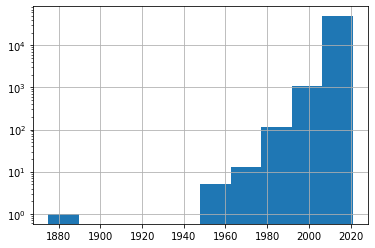

In [174]:
candidates_new['year'].hist(log=True)

In [175]:
len(candidates_new['unique_week'].unique())

901

In [176]:
len(candidates_new['owner'].unique())

5189

In [177]:
len(candidates_new['neighbourhood'].unique())

37

#### Merging the translated texts back to a Revised version of text data

The data are merged back in the order of English, translated Italian, and translated other languages

In [178]:
rev = {}
keys_en = list(filter_dict_en.keys())
keys_it = list(filter_dict_it.keys())
keys_other = list(filter_dict_other.keys())
for i in range(len(filter_en)):
    if not filter_en[i] in rev:
        rev[filter_en[i]] = filter_dict_en[keys_en[i]]
    else:
        rev[filter_en[i]] = '. '.join([rev[filter_en[i]], filter_dict_en[keys_en[i]]])
        
for i in range(len(filter_it)):
    if not filter_it[i] in rev:
        rev[filter_it[i]] = filter_dict_it[keys_it[i]]
    else:
        rev[filter_it[i]] = '. '.join([rev[filter_it[i]], filter_dict_it[keys_it[i]]])
        
for i in range(len(filter_other)):
    if not filter_other[i] in rev:
        rev[filter_other[i]] = filter_dict_other[keys_other[i]]
    else:
        rev[filter_other[i]] = '. '.join([rev[filter_other[i]], filter_dict_other[keys_other[i]]])

In [179]:
candidates_new['revised_text'] = pd.Series(rev)

In [180]:
candidates_new['text_len'] = candidates_new['revised_text'].apply(lambda x: len(x.split()))
candidates_new['num_sent'] = candidates_new['revised_text'].apply(lambda x: len(x.split('. ')))

Distribution of words per sentence and sentences per data point

<AxesSubplot:>

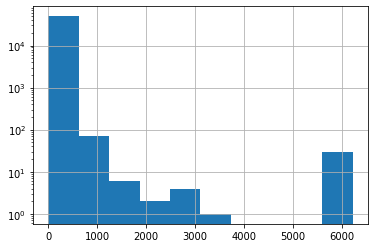

In [181]:
candidates_new['text_len'].hist(log=True)

<AxesSubplot:>

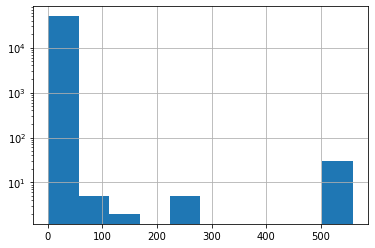

In [182]:
candidates_new['num_sent'].hist(log=True)

In [183]:
candidates_new

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                            0   
116672                                                            0   
116673                                                            0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ...                time  week  \
6       2010-03-27 12:47:45     90       0  ... 2010-03-27 12:47:45    12   
7       2010-03-27 12:45:28    238       0  ... 2010-03-27 12:45:28    12   
10      2020-08-11 11:48:15     25       0  ... 2020-08-11 11:48:15    33   
11      2020-08-11 11:44:31     27       0  ... 2020-08-11 11:44:31    33   
12      2020-08-11 11:43:19     20       0  ... 2020-08-11 11:43:19    33   
...                     ...    ...     ...  ...                 ...   ...   
116670  2015-07-03 11:34:58    244       0  ... 2015-07-03 11:34:58    27   
116671  2015-07-03 11:04:10    156       0  ... 2015-07-03 11:04:10    27   
116672  2015-07-03 11:34:25    163       0  ... 2015-07-03 11:34:25    27   
116673  2015-07-03 12:46:41    237       0  ... 2015-07-03 12:46:41    27   
116674  2015-07-03 11:45:53    160       0  ... 2015-07-03 11:45:53    27   

        unique_week                                          text_data  \
6            201012  El palacio Contarini del Bovolo (también llama...   
7            201012  El palacio Contarini del Bovolo (también llama...   
10           202033  Canal Grande on Venetsian pääliikenneväylä. Ku...   
11           202033  Corona-rajoitusten aikaan oli hyvä tilaisuus k...   
12           202033  Corona-rajoitusten aikaan oli hyvä tilaisuus k...   
...             ...                                                ...   
116670       201527  <a href="http://www.brusatotrasporti.it/index....   
11667

#### Merging the Revised Text data back to the full Dataset

Merging first back to the subset with text data and copy revised text data to the duplicates

In [184]:
cols_to_use = candidates_new.columns.difference(df_new.columns)
new = df_new.merge(candidates_new[cols_to_use], left_index=True, right_index=True, how='left')

In [185]:
text_dict = {}
for i in range(len(new)):
    if new.iloc[i]['text_data'] not in text_dict:
        text_dict[new.iloc[i]['text_data']] = new.iloc[i]['revised_text']

In [186]:
new['revised_text'] = new['text_data'].apply(lambda x: text_dict[x])

10774 data points have a text data field, but do not have a revised text data field, since the texts they have are *invalid*

In [187]:
new[new['revised_text'].isna()]

index        index          owner                        owner_loc  \
140        140  50649614946  191112660@N06                              NaN   
141        141  50648864358  191112660@N06                              NaN   
224        224  50588890818  126148507@N07                 Richmond, Surrey   
232        232  50581231026   88891484@N00                    New York, USA   
322        322  50444138146   10471762@N02                              NaN   
...        ...          ...            ...                              ...   
116547  122973  25191083976  123086686@N08                              NaN   
116548  122974  25217320035  123086686@N08                              NaN   
116549  122975  24590510943  123086686@N08                              NaN   
116608  123034  23058741244   29127542@N04  Mercer Island, Washington, U.S.   
116620  123046  23020497135   35951130@N04                              NaN   

                                     title                      description  \
140                    IMG_20190918_203814                                    
141                    IMG_20190918_212934                                    
224                            IMG_0626[1]                                    
232                               IMG_7456                                    
322     IMG_20200905_092455_BURST001_COVER                            burst   
...                                    ...                              ...   
116547                            DSC00208                                    
116548                            DSC00201                                    
116549                            DSC00274                                    
116608                            IMG_7547                                    
116620                            IMG_4609                                    

        comments                taken  views  people  ...                time  \
140            0  2019-09-18 20:38:15     46       0  ... 2019-09-18 20:38:15   
141            0  2019-09-18 21:29:35      1       0  ... 2019-09-18 21:29:35   
224            0  2018-11-05 15:53:01      4       0  ... 2018-11-05 15:53:01   
232            1  2017-10-07 09:50:53      5       0  ... 2017-10-07 09:50:53   
322            0  2020-09-05 09:24:55     10       0  ... 2020-09-05 09:24:55   
...          ...                  ...    ...     ...  ...                 ...   
116547         0  2013-05-19 06:51:14     18       0  ... 2013-05-19 06:51:14   
116548         0  2013-05-19 06:48:39     18       0  ... 2013-05-19 06:48:39   
116549         0  2013-05-19 12:13:56     18       0  ... 2013-05-19 12:13:56   
116608         0  2015-10-21 16:48:54    142       0  ... 2015-10-21 16:48:54   
116620         0  2015-11-08 16:39:49     14       0  ... 2015-11-08 16:39:49   

        week  unique_week                                          text_data  \
140       38       201938  . It has title of IMG_20190918_203814. It has ...   
141       38       201938  . It has title of IMG_20190918_212934. It has ...   
224       45       201845     . It has title of IMG_0626[1]. It has tags of    
232       40       201740        . It has title of IMG_7456. It has tags of    
322       36       202036  burst. It has title of IMG_20200905_092455_BUR...   
...      ...          ...                                                ...   
116547    20       201320                                 . It has title ...   
116548    20       201320                                 . It has title ...   
116549    20       201320                                 . It has title ...   
116608    43       201543        . It has title of IMG_7547. It has tags of    
116620    45       201545        . It has title of IMG_4609. It has tags of    

       English  Italian  Other_Lang num_sent  revised_text  text_len  
140        NaN      NaN         NaN      NaN           NaN       NaN  
141        NaN      NaN         NaN

Merging then back to the full dataset

In [188]:
cols_to_use = new.columns.difference(df.columns)
final_df = df.merge(new[cols_to_use], left_index=True, right_index=True, how='left')

In [189]:
final_df

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ...                time  week  \
6       2010-03-27 12:47:45     90       0  ... 2010-03-27 12:47:45    12   
7       2010-03-27 12:45:28    238       0  ... 2010-03-27 12:45:28    12   
10      2020-08-11 11:48:15     25       0  ... 2020-08-11 11:48:15    33   
11      2020-08-11 11:44:31     27       0  ... 2020-08-11 11:44:31    33   
12      2020-08-11 11:43:19     20       0  ... 2020-08-11 11:43:19    33   
...                     ...    ...     ...  ...                 ...   ...   
116670  2015-07-03 11:34:58    244       0  ... 2015-07-03 11:34:58    27   
116671  2015-07-03 11:04:10    156       0  ... 2015-07-03 11:04:10    27   
116672  2015-07-03 11:34:25    163       0  ... 2015-07-03 11:34:25    27   
116673  2015-07-03 12:46:41    237       0  ... 2015-07-03 12:46:41    27   
116674  2015-07-03 11:45:53    160       0  ... 2015-07-03 11:45:53    27   

        unique_week English Italian  Other_Lang  num_sent  \
6            201012     0.0     0.0         0.0      12.0   
7            201012     0.0     0.0         0.0      12.0   
10           202033     0.0     0.0         0.0       6.0   
11           202033     0.0     0.0         0.0       4.0   
12           202033     0.0     0.0         0.0       4.0   
...             ...     ...     ...         ...       ...   
116670       201527     0.0     0.0         0.0       2.0   
116671       201527     0.0     0.0         0.0       2.0   
116672       201527     0.0     0.0         0.0 

A few cases with super long text descriptions

In [190]:
final_df[final_df['num_sent']>20]['revised_text'].tolist()

['Casa Mainella, 1858 (recreating a style of transition from Gothic to Renaissance). Right, white: Palazzi Contarini Corfù, 15th cen. partly remodeled in the 18th and 19th centuries. The photo was taken from Ponte de le Maravegie, or Bridge of Wonders. There is a legend about this bridge and its name. .Seven sisters lived in the palace to the left of the bridge. Six were beautiful and one, Marina, ugly. A boatman called Matteo wanted to marry one of the beautiful sisters and visited the palace often but fell ill, prey to a debilitating disease. He attributed his illness to witchcraft perpetrated by the ugly sister who had constantly avoided him. One day, as he approached the palace from the bridge, he saw through one of the windows Marina praying and crying in front of a crucifix. He was moved by this scene and by the sudden apparition on the sky of six bright stars and a dim one. But the six stars soon disappeared and the dim one became so bright that it lit the whole sky. At once Mat

### Creating a one-hot Embedding for frequent Tags

#### Generating a tag dictionary with appearance counts

With the tags of the complete dataset

In [194]:
tag_dict = {}
for i in final_df.index:
    list_now = final_df.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

Or alternatively, with the tags from the subset of unique and valid text data

In [196]:
tag_dict = {}
for i in candidates_new.index:
    list_now = candidates_new.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

In [199]:
len(tag_dict)

17677

#### Converting tags to non-capitalized and translating tag words into English, if possible

In [ ]:
tag_dict_en = {}
for k, v in tag_dict.items():
    w = GoogleTranslator(source='auto', target='en').translate(k.lower())
    if not w in tag_dict_en:
        tag_dict_en[w] = {}
        tag_dict_en[w]['count'] = v['count']
        tag_dict_en[w]['origin'] = set(v['origin'])
    else:
        tag_dict_en[w]['count'] += v['count']
        tag_dict_en[w]['origin'] = tag_dict_en[w]['origin'].union(set(v['origin']))

1865 out of 2113 tags remained after translating

In [805]:
len(tag_dict),len(tag_dict_en)

(2113, 1865)

#### Converting the tag dictionary to a pandas DataFrame

In [803]:
tag_df = pd.DataFrame(tag_dict_en).T.sort_values(by='count',ascending=False)

In [200]:
tag_df = pd.DataFrame(tag_dict).T.sort_values(by='count',ascending=False)

It could be observed that this tag distribution has a very long tail, and the most frequent tags are only referring to the place, which may need to be filtered out

In [201]:
tag_df.head(30)

count                                             origin
venice          25047  [10, 11, 12, 13, 28, 29, 30, 31, 59, 61, 70, 8...
italy           19388  [10, 11, 12, 13, 28, 29, 30, 31, 70, 83, 87, 1...
venezia         17650  [10, 11, 12, 13, 28, 29, 30, 31, 59, 79, 80, 8...
italia           8629  [6, 7, 16, 28, 29, 30, 31, 87, 109, 137, 138, ...
veneto           7699  [10, 11, 12, 13, 59, 82, 150, 187, 239, 379, 4...
venedig          4587  [59, 82, 88, 109, 113, 114, 116, 120, 122, 125...
venise           3920  [59, 70, 90, 119, 148, 149, 161, 162, 262, 379...
italien          3603  [88, 109, 113, 114, 116, 120, 122, 125, 137, 1...
italie           3034  [119, 148, 149, 161, 162, 187, 379, 762, 784, ...
it               2869  [1119, 2790, 2791, 4204, 4636, 4637, 4638, 463...
architecture     2594  [24, 150, 415, 515, 907, 917, 925, 942, 946, 9...
geo              2378  [4737, 4737, 4738, 4738, 4739, 4739, 6180, 618...
biennale         2205  [3726, 4534, 5764, 7857, 7858, 7875, 7901, 818...
canal            2157  [10, 11, 12, 82, 252, 380, 406, 414, 427, 430,...
art              1974  [926, 1639, 1643, 1644, 1669, 1680, 1685, 1686...
venecia          1880  [6, 7, 16, 59, 82, 187, 252, 379, 413, 437, 43...
square           1755  [20, 932, 947, 1179, 1182, 1183, 1184, 1490, 1...
europe           1754  [87, 150, 202, 252, 907, 927, 943, 944, 945, 9...
uploaded         1619  [4724, 4882, 4922, 4947, 4948, 4958, 4959, 496...
squareformat     1530  [4724, 4882, 4922, 4947, 4948, 4958, 4959, 496...
iphoneography    1530  [4724, 4882, 4922, 4947, 4948, 4958, 4959, 496...
instagramapp     1526  [4724, 4882, 4922, 4947, 4948, 4958, 4959, 496...
church           1497  [188, 190, 192, 206, 211, 214, 216, 218, 220, ...
ita              1435  [4737, 4738, 4739, 7383, 8221, 8525, 8750, 101...
water            1298  [24, 28, 29, 30, 31, 70, 119, 197, 414, 972, 9...
april            1251  [4208, 4209, 4210, 4211, 4212, 4213, 4214, 421...
v                1231  [187, 379, 974, 1957, 2506, 3334, 4196, 4414, ...
geotagged        1213  [4737, 4738, 4739, 6458, 6459, 6463, 6806, 680...
venicebiennale   1179  [9776, 9776, 9782, 9782, 9783, 9783, 9784, 978...
city             1178  [24, 87, 150, 380, 415, 515, 926, 942, 946, 94...

<AxesSubplot:>

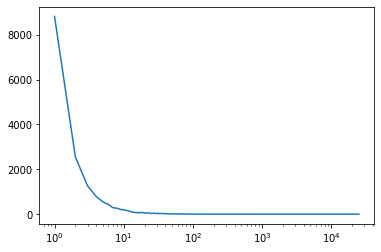

In [202]:
tag_df['count'].value_counts().sort_index().plot(logx=True)

#### Deciding on the dimension of the embedding

The number of 3 seems to provide an elbow point for the remained tags for embedding

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\2172957866.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<2800]))


<AxesSubplot:>

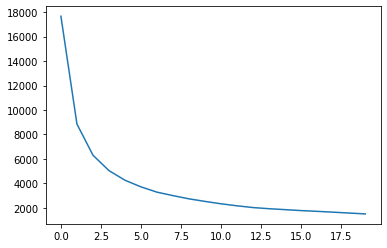

In [210]:
xs = []
for i in range(20):
    xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<2800]))
pd.Series(xs).plot()

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\4100487448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_df[tag_df['count']>3][tag_df['count']<2800]['count'].value_counts().sort_index().plot()


<AxesSubplot:>

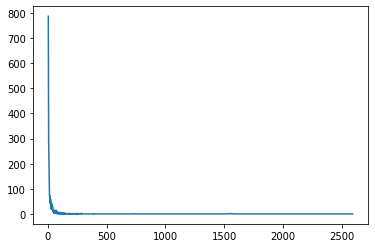

In [206]:
tag_df[tag_df['count']>3][tag_df['count']<2800]['count'].value_counts().sort_index().plot()

A total of 5039 tags remained in the embedding after filtering

In [207]:
tag_emb = tag_df[tag_df['count']>3][tag_df['count']<2800]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_43476\1479918189.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_emb = tag_df[tag_df['count']>3][tag_df['count']<2800]


In [208]:
tag_emb['edge_l'] = tag_emb['origin'].apply(lambda x: list(x))

In [209]:
tag_emb

count  \
architecture                      2594   
geo                               2378   
biennale                          2205   
canal                             2157   
art                               1974   
...                                ...   
byzantinearchitecture                4   
ebrei                                4   
adelelsiwi                           4   
xiii                                 4   
giovannibattistacimadaconegliano     4   

                                                                             origin  \
architecture                      [24, 150, 415, 515, 907, 917, 925, 942, 946, 9...   
geo                               [4737, 4737, 4738, 4738, 4739, 4739, 6180, 618...   
biennale                          [3726, 4534, 5764, 7857, 7858, 7875, 7901, 818...   
canal                             [10, 11, 12, 82, 252, 380, 406, 414, 427, 430,...   
art                               [926, 1639, 1643, 1644, 1669, 1680, 1685, 1686...   
...                                                                             ...   
byzantinearchitecture                                  [14654, 44317, 44318, 45035]   
ebrei                                              [106643, 106661, 107112, 112367]   
adelelsiwi                                             [42563, 42564, 42565, 42566]   
xiii                                                   [28158, 89697, 89733, 96820]   
giovannibattistacimadaconegliano                       [1480, 36469, 36470, 107381]   

                                                                             edge_l  
architecture                      [24, 150, 415, 515, 907, 917, 925, 942, 946, 9...  
geo                               [4737, 4737, 4738, 4738, 4739, 4739, 6180, 618...  
biennale                          [3726, 4534, 5764, 7857, 7858, 7875, 7901, 818...  
canal                             [10, 11, 12, 82, 252, 380, 406, 414, 427, 430,...  
art                               [926, 1639, 1643, 1644, 1669, 1680, 1685, 1686...  
...                                                                             ...  
byzantinearchitecture                                  [14654, 44317, 44318, 45035]  
ebrei                                              [106643, 106661, 107112, 112367]  
adelelsiwi                                             [42563, 42564, 42565, 42566]  
xiii                                                   [28158, 89697, 89733, 96820]  
giovannibattistacimadaconegliano                       [1480, 36469, 36470, 107381]  

[5039 rows x 3 columns]

#### Constructing a Bipartite Graph for effective mapping of tag embedding

In [211]:
import networkx as nx

In [212]:
G=nx.from_dict_of_lists(tag_emb.to_dict()['edge_l'])

In [213]:
nx.is_bipartite(G)

True

In [214]:
emb_temp = nx.to_pandas_adjacency(G, dtype=int)

Filter out the tags with only one letter would result a tag embedding dimension of 347

In [215]:
tags = list(tag_emb.index)

In [216]:
tags_n = [w for w in tags if len(w)>2]

In [217]:
len(pd.Series(tags_n).apply(lambda x : x.lower()).unique())

4916

In [218]:
tags_n

['architecture',
 'geo',
 'biennale',
 'canal',
 'art',
 'venecia',
 'square',
 'europe',
 'uploaded',
 'squareformat',
 'iphoneography',
 'instagramapp',
 'church',
 'ita',
 'water',
 'april',
 'geotagged',
 'venicebiennale',
 'city',
 'afsdxvrzoomnikkor',
 'exif',
 'arsenale',
 'boat',
 'travel',
 'carnevalevenezia',
 'venetien',
 'bridge',
 'nikon',
 'giudecca',
 'carnavalvenise',
 'gondola',
 'exhibition',
 'canon',
 'dalbera',
 'sanmarco',
 'veneza',
 'grandcanal',
 'cannaregio',
 'europa',
 'karnevalvenedig',
 'people',
 'sangiorgiomaggiore',
 'sculpture',
 'wenecja',
 'chiesa',
 'ben',
 'street',
 'arte',
 'sea',
 'foursquare',
 'giardini',
 'dorsoduro',
 'veneti',
 'venicecarnival',
 'castello',
 'laguna',
 'unescoworldheritagesite',
 'canalgrande',
 'camera',
 'night',
 'urban',
 'sesti',
 'sunset',
 'sky',
 'nikond',
 'labiennaledivenezia',
 'san',
 'blackandwhite',
 'pavilion',
 'boats',
 'museum',
 'building',
 'itali',
 'kirche',
 'august',
 'karneval',
 'basilica',
 'prov

#### Tags embedding for data samples

As results, the 4916-dimensional tags embedding could be mapped back to 32129 data points. Note that the duplicated data points in terms of text data are not considered.

In [219]:
tags_emb = emb_temp.loc[tags_n].T.loc[~emb_temp.index.isin(tags)].sort_index()

In [220]:
tags_emb

architecture  geo  biennale  canal  art  venecia  square  europe  \
6                  0    0         0      0    0        1       0       0   
7                  0    0         0      0    0        1       0       0   
10                 0    0         0      1    0        0       0       0   
11                 0    0         0      1    0        0       0       0   
12                 0    0         0      1    0        0       0       0   
...              ...  ...       ...    ...  ...      ...     ...     ...   
116670             0    0         0      0    0        0       0       0   
116671             0    0         0      0    0        0       0       0   
116672             0    0         0      0    0        0       0       0   
116673             0    0         0      0    0        0       0       0   
116674             0    0         0      0    0        0       0       0   

        uploaded  squareformat  ...  framer  fanta  struttura  tables  \
6              0             0  ...       0      0          0       0   
7              0             0  ...       0      0          0       0   
10             0             0  ...       0      0          0       0   
11             0             0  ...       0      0          0       0   
12             0             0  ...       0      0          0       0   
...          ...           ...  ...     ...    ...        ...     ...   
116670         0             0  ...       0      0          0       0   
116671         0             0  ...       0      0          0       0   
116672         0             0  ...       0      0          0       0   
116673         0             0  ...       0      0          0       0   
116674         0             0  ...       0      0          0       0   

        giovannibattistacima  byzantinearchitecture  ebrei  adelelsiwi  xiii  \
6                          0                      0      0           0     0   
7                          0                      0      0           0     0   
10                         0                      0      0           0     0   
11                         0                      0      0           0     0   
12                         0                      0      0           0     0   
...                      ...                    ...    ...         ...   ...   
116670                     0                      0      0           0     0   
116671                     0                      0      0           0     0   
116672                     0                      0      0           0     0   
116673                     0                      0      0           0     0   
116674                     0                      0      0           0     0   

        giovannibattistacimadaconegliano  
6                                      0  
7                                      0  
10                                     0  
11                                     0  
12                                     0  
...                                  ...  
116670                                 0  
116671                                 0  
116672                                 0  
116673                                 0  
116674                                 0  

[32129 rows x 4916 columns]

In [221]:
tags_VEC = tags_emb.apply(lambda x: np.array(x), axis=1).rename('VECTOR')

In [222]:
tags_VEC

6         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                ...                        
116670    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
116671    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
116672    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
116673    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
116674    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: VECTOR, Length: 32129, dtype: object

#### A subset with complet tag embeddings

In [223]:
sub = final_df.merge(tags_VEC, how='right', left_index=True, right_index=True)

In [224]:
sub

index        index          owner                    owner_loc  \
6            6  50770113131  148125504@N04  Tarazona (Zaragoza), España   
7            7  50770228312  148125504@N04  Tarazona (Zaragoza), España   
10          10  50766039303   32980384@N05              Berlin, Germany   
11          11  50766893587   32980384@N05              Berlin, Germany   
12          12  50766892772   32980384@N05              Berlin, Germany   
...        ...          ...            ...                          ...   
116670  123096  20879329608   23097900@N02                      Germany   
116671  123097  21040989736   23097900@N02                      Germany   
116672  123098  20880415099   23097900@N02                      Germany   
116673  123099  20879281658   23097900@N02                      Germany   
116674  123100  21074834751   23097900@N02                      Germany   

                                                    title  \
6                         Venecia - Patio Palacio Minelli   
7                               Venecia - Palacio Minelli   
10                                               _DSC7807   
11                                               _DSC7805   
12                                               _DSC7802   
...                                                   ...   
116670  Hier werden die Pakete mit dem Lastkahn zugest...   
116671                                         Tür No.342   
116672                                          Ave Maria   
116673           Kirchenportal der Chiesa di Santa Sofia.   
116674               Tür im jüdischer Bezirk von Venedig.   

                                              description  comments  \
6       El palacio Contarini del Bovolo (también llama...         3   
7       El palacio Contarini del Bovolo (también llama...         7   
10      Canal Grande on Venetsian pääliikenneväylä. Ku...         0   
11      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
12      Corona-rajoitusten aikaan oli hyvä tilaisuus k...         0   
...                                                   ...       ...   
116670  <a href="http://www.brusatotrasporti.it/index....         0   
116671                                                NaN         0   
116672                                                NaN         0   
116673                                                NaN         0   
116674  <a href="http://www.venediginformationen.eu/ue...         0   

                      taken  views  people  ... week  unique_week  English  \
6       2010-03-27 12:47:45     90       0  ...   12       201012      0.0   
7       2010-03-27 12:45:28    238       0  ...   12       201012      0.0   
10      2020-08-11 11:48:15     25       0  ...   33       202033      0.0   
11      2020-08-11 11:44:31     27       0  ...   33       202033      0.0   
12      2020-08-11 11:43:19     20       0  ...   33       202033      0.0   
...                     ...    ...     ...  ...  ...          ...      ...   
116670  2015-07-03 11:34:58    244       0  ...   27       201527      0.0   
116671  2015-07-03 11:04:10    156       0  ...   27       201527      0.0   
116672  2015-07-03 11:34:25    163       0  ...   27       201527      0.0   
116673  2015-07-03 12:46:41    237       0  ...   27       201527      0.0   
116674  2015-07-03 11:45:53    160       0  ...   27       201527      0.0   

       Italian Other_Lang  num_sent  \
6          0.0        0.0      12.0   
7          0.0        0.0      12.0   
10         0.0        0.0       6.0   
11         0.0        0.0       4.0   
12         0.0        0.0       4.0   
...        ...        ...       ...   
116670     0.0        0.0       2.0   
116671     0.0        0.0       2.0   
116672     0.0        0.0       2.0   
116673     0.0        0.0       2.0   
116674     0.0        0.0       2.0   

                                             revised_text  \
6       It has title of Venice - Minelli Palace Courty.

### Save the Datasets generated

In [191]:
sentences.to_csv('data_storage/images/sentences.csv',sep='\t')

In [192]:
candidates_new.to_csv('data_storage/images/metadata_unique_text.csv',sep='\t')

In [193]:
final_df.to_csv('data_storage/images/metadata.csv',sep='\t')

In [225]:
tags_emb.to_csv('data_storage/images/tags_embedding.csv',sep='\t')

In [226]:
sub.to_csv('data_storage/images/meta_with_tags.csv',sep='\t')

### Comparing the Tags Embedding

In [228]:
tags_emb_V = pd.read_csv('Venezia/data_storage/tags_embedding.csv',sep='\t', index_col='Unnamed: 0')
tags_emb_S = pd.read_csv('Suzhou/data_storage/tags_embedding.csv',sep='\t', index_col='Unnamed: 0')

In [231]:
tags_V = set(tags_emb_V.columns)
tags_S = set(tags_emb_S.columns)
tags_L = set(tags_emb.columns)

In [230]:
tags_V.intersection(tags_S)

{'architecture',
 'art',
 'building',
 'canal',
 'canon',
 'city',
 'family',
 'film',
 'fuji movie',
 'garden',
 'green',
 'house',
 'landscape',
 'man',
 'monochrome',
 'museum',
 'nature',
 'night',
 'people',
 'photography',
 'places',
 'red',
 'reflection',
 'river',
 'sony',
 'square',
 'street',
 'unescoworldheritagesite',
 'wall',
 'water'}

In [232]:
tags_V.intersection(tags_L)

{'abstract',
 'accademia',
 'adriaticsea',
 'alpha',
 'altar',
 'analog',
 'architecture',
 'arsenal',
 'art',
 'bacinodisanmarco',
 'baldassarelonghena',
 'barca',
 'baroque',
 'basilica',
 'basilicadisanmarco',
 'batis',
 'belfry',
 'ber',
 'best',
 'biennale',
 'black',
 'blackandwhite',
 'blackwhite',
 'blue',
 'bluesky',
 'boat',
 'boats',
 'books',
 'boot',
 'brick',
 'bridge',
 'brook',
 'buchmalerei',
 'building',
 'buildings',
 'byerwin',
 'cadoro',
 'campanile',
 'canal',
 'canalgrande',
 'canals',
 'cannaregio',
 'canon',
 'canonef',
 'canoneos',
 'car',
 'carlzeiss',
 'carnival',
 'castello',
 'cell',
 'channel',
 'chapel',
 'choralbooks',
 'christ',
 'christian',
 'christianity',
 'church',
 'city',
 'cityscape',
 'clock',
 'cloister',
 'clothesline',
 'clouds',
 'color',
 'colors',
 'colours',
 'corona',
 'covid',
 'creek',
 'crusaderknight',
 'darkness',
 'detail',
 'dogenpalast',
 'dogespalace',
 'door',
 'dorsoduro',
 'drasphotography',
 'eos',
 'etr',
 'euro',
 'europ

In [233]:
len(tags_V.intersection(tags_L))

285

In [234]:
len(tags_V)

347